# FINAL Project IAF 603 
Group:
Vathana Him
Andrew Linberg
Dajonna Williams

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('Full_Country_Covid.csv')
df2 = pd.read_csv('full_data.csv')
pd.set_option('display.max_columns', None)

/Users/vathanahim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Remove uneeded column
df1 = df1.drop(['CountryCode','RegionName', 'RegionCode'], axis=1)
#convert date to appropriate formatt
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y%m%d')

##### Clean data for united states because it's the only country that has data for specific states so we have to take average and group it by country and date then clean df1 after 

In [4]:
#select only United States data
df1_united_states = df1.loc[df1['CountryName']=='United States']
df1_united_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14151 entries, 47793 to 61943
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   CountryName                            14151 non-null  object        
 1   Date                                   14151 non-null  datetime64[ns]
 2   C1_School closing                      13515 non-null  float64       
 3   C1_Flag                                9671 non-null   float64       
 4   C2_Workplace closing                   13496 non-null  float64       
 5   C2_Flag                                9740 non-null   float64       
 6   C3_Cancel public events                13496 non-null  float64       
 7   C3_Flag                                9709 non-null   float64       
 8   C4_Restrictions on gatherings          13496 non-null  float64       
 9   C4_Flag                                8699 non-null   fl

In [5]:
#get list of columns that we need to take average of 
df1_united_states_col = [i for i in df1_united_states.columns]
df1_united_states_col[2:]

['C1_School closing',
 'C1_Flag',
 'C2_Workplace closing',
 'C2_Flag',
 'C3_Cancel public events',
 'C3_Flag',
 'C4_Restrictions on gatherings',
 'C4_Flag',
 'C5_Close public transport',
 'C5_Flag',
 'C6_Stay at home requirements',
 'C6_Flag',
 'C7_Restrictions on internal movement',
 'C7_Flag',
 'C8_International travel controls',
 'E1_Income support',
 'E1_Flag',
 'E2_Debt/contract relief',
 'E3_Fiscal measures',
 'E4_International support',
 'H1_Public information campaigns',
 'H1_Flag',
 'H2_Testing policy',
 'H3_Contact tracing',
 'H4_Emergency investment in healthcare',
 'H5_Investment in vaccines',
 'M1_Wildcard',
 'StringencyIndex',
 'StringencyIndexForDisplay',
 'StringencyLegacyIndex',
 'StringencyLegacyIndexForDisplay',
 'GovernmentResponseIndex',
 'GovernmentResponseIndexForDisplay',
 'ContainmentHealthIndex',
 'ContainmentHealthIndexForDisplay',
 'EconomicSupportIndex',
 'EconomicSupportIndexForDisplay']

In [6]:
#groupy by and average it 
df1_united_states = df1_united_states.groupby(['CountryName','Date'])[df1_united_states_col[2:]].mean().reset_index()

In [7]:
#delete old united states data from overall dataframe and add new one
df1 = df1[df1.CountryName != 'United States']
df1 = df1.append(df1_united_states)

In [8]:
df1_clean = df1[['CountryName','Date','StringencyIndex','GovernmentResponseIndex','ContainmentHealthIndex','EconomicSupportIndex']]
df1_clean = df1_clean.dropna()

In [9]:
#convert date object in dataframe back to string format 
df1_clean['Date'] =df1_clean['Date'].dt.strftime('%Y-%m-%d')
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47650 entries, 0 to 254
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CountryName              47650 non-null  object 
 1   Date                     47650 non-null  object 
 2   StringencyIndex          47650 non-null  float64
 3   GovernmentResponseIndex  47650 non-null  float64
 4   ContainmentHealthIndex   47650 non-null  float64
 5   EconomicSupportIndex     47650 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.5+ MB


#### clean df2 by formatting dates and caculating fatality ratio

In [10]:
df2['fatality_ratio'] = df2['total_deaths']/df2['total_cases']

In [11]:
df1_country_list = df1_clean['CountryName'].values.tolist()

In [12]:
#filter for countries that only appear in policy data and select only needed rows
df2_clean = df2.location.isin(df1_country_list)
df2_clean = df2[['date','total_cases','total_deaths','fatality_ratio', 'location']]
df2_clean = df2_clean.dropna()
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38030 entries, 56 to 41367
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            38030 non-null  object 
 1   total_cases     38030 non-null  float64
 2   total_deaths    38030 non-null  float64
 3   fatality_ratio  38030 non-null  float64
 4   location        38030 non-null  object 
dtypes: float64(3), object(2)
memory usage: 1.7+ MB


### Data storage

In [13]:
import sqlite3

In [14]:
db = "proj.db"
conn = sqlite3.connect(db)
print(conn)

In [15]:
#creating database with appropriate fields

conn = sqlite3.connect(db)
crsr = conn.cursor()
crsr.execute("DROP TABLE IF EXISTS 'POLICY_DATA'")
print("Table Dropped")
conn.close()


conn = sqlite3.connect(db)
crsr = conn.cursor()
crsr.execute("DROP TABLE IF EXISTS 'COVID_DATA'")
print("Table Dropped")
conn.close()

Table Dropped
Table Dropped


In [16]:
df1_list = df1_clean.values.tolist()
df1_list

[['Aruba', '2020-01-01', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-02', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-03', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-04', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-05', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-06', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-07', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-08', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-09', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-10', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-11', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-12', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-13', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-14', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-15', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-16', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-17', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-18', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-19', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-20', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-21', 0.0, 0.0, 0.0, 0.0],
 ['Aruba', '2020-01-22', 0.0, 0.0,

In [17]:
df2_list = df2_clean.values.tolist()
df2_list

[['2020-02-25', 1.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-02-26', 1.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-02-27', 1.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-02-28', 1.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-02-29', 1.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-01', 1.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-02', 1.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-08', 4.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-11', 7.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-15', 10.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-16', 16.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-17', 21.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-18', 22.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-19', 22.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-20', 22.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-21', 24.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-22', 24.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-23', 34.0, 0.0, 0.0, 'Afghanistan'],
 ['2020-03-24', 40.0, 1.0, 0.025, 'Afghanistan'],
 ['2020-03-25', 42.0, 1.0, 0.023809523809523808, 'Afghanistan'],
 ['2020-03-26', 75.0, 1.0, 0.0

In [18]:
#create table for POLICY DATA and COVID DATA
conn = sqlite3.connect(db)
crsr = conn.cursor()
try:
    crsr.execute("""
    CREATE TABLE POLICY_DATA (
    Country_Name TEXT,
    Date datetime,
    Stringency_Index FLOAT DEFAULT 0,
    Government_Response_Index FLOAT DEFAULT 0,
    Containment_Health_Index FLOAT DEFAULT 0,
    Economic_Support_Index FLOAT DEFAULT 0
    );
    """)
    crsr.execute("""
    CREATE TABLE COVID_DATA (
    Date datetime,
    Total_Case FLOAT DEFAULT 0,
    Total_Death FLOAT DEFAULT 0,
    Fatality_Ratio FLOAT DEFAULT 0,
    Location TEXT
    );""")
    print("Success Creation")
except Exception as e:
    print(str(e))
    print("Failed Creation")
finally:
    conn.close()

Success Creation


In [19]:
#insert data policy into table
conn = sqlite3.connect(db)
crsr = conn.cursor()
try:
    crsr.executemany("""
    INSERT INTO POLICY_DATA (Country_Name, Date, Stringency_Index, Government_Response_Index,
    Containment_Health_Index, Economic_Support_Index)
    VALUES (?,?,?,?,?,?)
    """, df1_list)
    conn.commit()
    print("Insert Successful")
except Exception as e:
    print(str(e))
    print("Insert Failed")
finally:
    conn.close()
    
#insert data covid into table
conn = sqlite3.connect(db)
crsr = conn.cursor()
try:
    crsr.executemany("""
    INSERT INTO COVID_DATA (Date, Total_Case, Total_Death, Fatality_Ratio, Location)
    VALUES (?,?,?,?,?)
    """, df2_list)
    conn.commit()
    print("Insert Successful")
except Exception as e:
    print(str(e))
    print("Insert Failed")
finally:
    conn.close()

Insert Successful
Insert Successful


In [20]:
#creating table that contains total data
conn = sqlite3.connect(db)
crsr = conn.cursor()
crsr.execute("DROP TABLE IF EXISTS `Totaldata`")
print("Table dropped")
conn.close()

Table dropped


In [21]:
#Join two tables together into one
conn = sqlite3.connect(db)
crsr = conn.cursor()
crsr.execute("""
CREATE TABLE Totaldata as SELECT * FROM (
SELECT * FROM COVID_DATA
INNER JOIN POLICY_DATA ON POLICY_DATA.Date = COVID_DATA.Date AND POLICY_DATA.Country_Name = COVID_DATA.Location
)
""")
conn.close()

In [22]:
conn = sqlite3.connect(db)
sql = """
Select * FROM Totaldata Where Location == 'South Korea' OR Location=='United States' OR
Location == 'Sweden'
"""
df_total = pd.read_sql(sql, conn)
df_total

,Date,Total_Case,Total_Death,Fatality_Ratio,Location,Country_Name,Date:1,Stringency_Index,Government_Response_Index,Containment_Health_Index,Economic_Support_Index
0,2020-01-20,1.0,0.0,0.000000,South Korea,South Korea,2020-01-20,0.000000,0.000000,0.000000,0.000000
1,2020-01-21,1.0,0.0,0.000000,South Korea,South Korea,2020-01-21,0.000000,2.560000,3.030000,0.000000
2,2020-01-22,1.0,0.0,0.000000,South Korea,South Korea,2020-01-22,0.000000,2.560000,3.030000,0.000000
3,2020-01-23,1.0,0.0,0.000000,South Korea,South Korea,2020-01-23,0.000000,2.560000,3.030000,0.000000
4,2020-01-24,2.0,0.0,0.000000,South Korea,South Korea,2020-01-24,0.000000,2.560000,3.030000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
672,2020-09-01,6031013.0,183598.0,0.030442,United States,United States,2020-09-01,58.490377,64.030377,62.807170,71.634615
673,2020-09-02,6075652.0,184689.0,0.030398,United States,United States,2020-09-02,58.420566,64.090943,62.750000,71.462264
674,2020-09-03,6114406.0,185744.0,0.030378,United States,United States,2020-09-03,58.060784,64.015098,62.596275,71.813725
675,2020-09-04,6150655.0,186797.0,0.030370,United States,United States,2020-09-04,57.461569,63.600588,62.106078,71.813725


### SQL Discoveries

In [23]:
sql = """ Select Date, Location, max(Fatality_Ratio)
From Totaldata Where Location == 'South Korea' OR Location=='United States' OR
Location == 'Sweden'
Group By Location"""
q1 = pd.read_sql(sql, conn)
q1

,Date,Location,max(Fatality_Ratio)
0,2020-05-26,South Korea,0.023964
1,2020-04-21,Sweden,0.138975
2,2020-03-04,United States,0.072000


In [24]:
sql = """ Select Date, sum(Total_Case), Location
From Totaldata Where Location == 'South Korea' or Location=='United States' or
Location == 'Sweden'
Group By Location"""
q2 = pd.read_sql(sql, conn)
q2

,Date,sum(Total_Case),Location
0,2020-01-20,2300047.0,South Korea
1,2020-02-01,8119622.0,Sweden
2,2020-01-21,432885847.0,United States


In [25]:
sql = """ Select Date, max(Total_Case), Location
From Totaldata Where Location == 'South Korea' or Location=='United States' or
Location == 'Sweden'
Group By Location"""
q3 = pd.read_sql(sql, conn)
q3

,Date,max(Total_Case),Location
0,2020-09-04,20842.0,South Korea
1,2020-09-04,84985.0,Sweden
2,2020-09-05,6201726.0,United States


In [26]:
sql = """ Select Date, max(Containment_Health_Index), max(Stringency_Index),
max(Government_Response_Index), max(Economic_Support_Index),Location
From Totaldata Where Location == 'South Korea' or Location=='United States' or
Location == 'Sweden'
Group By Location"""
q4 = pd.read_sql(sql, conn)
q4

,Date,max(Containment_Health_Index),max(Stringency_Index),max(Government_Response_Index),max(Economic_Support_Index),Location
0,2020-03-30,85.610000,82.410000,80.130000,50.000000,South Korea
1,2020-03-16,48.480000,46.300000,50.640000,62.500000,Sweden
2,2020-05-14,74.199434,79.193019,74.177358,75.471698,United States


In [27]:
sql = """ Select Date, avg(Total_Death), avg(Fatality_Ratio),Location
From Totaldata Where Location == 'South Korea' or Location=='United States' or
Location == 'Sweden'
Group By Location"""
q5 = pd.read_sql(sql, conn)
q5

,Date,avg(Total_Death),avg(Fatality_Ratio),Location
0,2020-01-20,199.195652,0.016341,South Korea
1,2020-02-01,3238.013761,0.073813,Sweden
2,2020-01-21,76382.868996,0.034796,United States


### Visualization 

In [28]:
import seaborn as sns
import matplotlib.pylab as plt

In [29]:
countries = df_total['Location']
total_cases = df_total['Total_Case']
total_death = df_total['Total_Death']
fatality_ration = df_total['Fatality_Ratio']
date = df_total['Date']

In [30]:
df_total['log_total_case'] = np.log10(df_total['Total_Case'])
df_total['month_yr'] = pd.to_datetime(df_total['Date']).dt.strftime('%m/%Y')

In [31]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       677 non-null    object 
 1   Total_Case                 677 non-null    float64
 2   Total_Death                677 non-null    float64
 3   Fatality_Ratio             677 non-null    float64
 4   Location                   677 non-null    object 
 5   Country_Name               677 non-null    object 
 6   Date:1                     677 non-null    object 
 7   Stringency_Index           677 non-null    float64
 8   Government_Response_Index  677 non-null    float64
 9   Containment_Health_Index   677 non-null    float64
 10  Economic_Support_Index     677 non-null    float64
 11  log_total_case             677 non-null    float64
 12  month_yr                   677 non-null    object 
dtypes: float64(8), object(5)
memory usage: 68.9+ KB


In [32]:
df_total_sweden = df_total.loc[df_total['Location'] == 'Sweden']
df_total_sweden.describe()


,Total_Case,Total_Death,Fatality_Ratio,Stringency_Index,Government_Response_Index,Containment_Health_Index,Economic_Support_Index,log_total_case
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,37245.972477,3238.013761,0.073813,32.868119,38.976560,36.833899,50.745413,3.746791
std,31984.976245,2416.440040,0.046332,16.418287,13.876847,12.178615,24.034117,1.632382
min,1.000000,0.000000,0.000000,0.000000,10.260000,12.120000,0.000000,0.000000
25%,2784.500000,115.750000,0.041443,32.410000,39.740000,35.610000,62.500000,3.444331
50%,31476.000000,4081.000000,0.076789,38.890000,45.510000,42.420000,62.500000,4.497955
75%,72756.500000,5651.750000,0.114499,46.300000,48.080000,45.450000,62.500000,4.861872
max,84985.000000,5835.000000,0.138975,46.300000,50.640000,48.480000,62.500000,4.929342


In [33]:
df_total_us = df_total.loc[df_total['Location'] == 'United States']
df_total_us.describe()

,Total_Case,Total_Death,Fatality_Ratio,Stringency_Index,Government_Response_Index,Containment_Health_Index,Economic_Support_Index,log_total_case
count,2.290000e+02,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,1.890331e+06,76382.868996,0.034796,53.245123,54.571834,54.737488,53.675476,5.023705
std,1.946225e+06,65814.474998,0.020845,25.404093,23.694261,22.495144,31.271783,2.130536
min,1.000000e+00,0.000000,0.000000,0.445849,6.706415,7.886792,0.235849,0.000000
25%,6.427000e+03,108.000000,0.019315,55.668679,48.699245,53.523962,22.169811,3.808008
50%,1.390746e+06,84133.000000,0.035055,61.660566,65.844151,64.829434,72.169811,6.143248
75%,3.118008e+06,133291.000000,0.054932,70.605472,70.434528,69.904528,74.056604,6.493877
max,6.201726e+06,187765.000000,0.072000,79.193019,74.177358,74.199434,75.471698,6.792513


In [34]:
df_total_sk = df_total.loc[df_total['Location'] == 'South Korea']
df_total_sk.describe()

,Total_Case,Total_Death,Fatality_Ratio,Stringency_Index,Government_Response_Index,Containment_Health_Index,Economic_Support_Index,log_total_case
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,10000.204348,199.195652,0.016341,49.968087,54.616261,57.964043,36.195652,3.598567
std,5346.839501,116.549710,0.008260,17.380605,16.318512,17.061932,21.595345,1.092507
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8343.250000,82.250000,0.009857,43.520000,53.210000,53.790000,25.000000,3.921330
50%,10976.500000,259.500000,0.020873,54.170000,56.730000,62.500000,50.000000,4.040464
75%,13326.750000,287.750000,0.022511,56.940000,62.500000,64.770000,50.000000,4.124724
max,20842.000000,331.000000,0.023964,82.410000,80.130000,85.610000,50.000000,4.318939


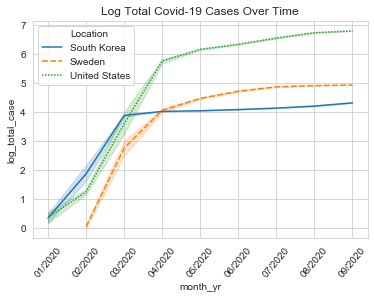

In [35]:
sns.set_style("whitegrid")
ax = sns.lineplot(data = df_total, x=df_total['month_yr'], y=df_total['log_total_case'], hue=df_total['Location'], style=df_total['Location'])
ax.set(title = "Log Total Covid-19 Cases Over Time")
plt.xticks(rotation=50)
plt.show()

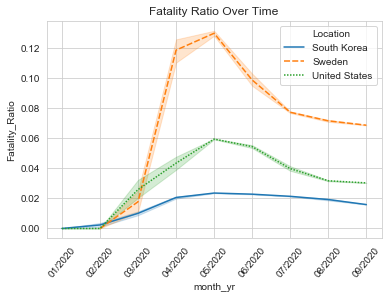

In [36]:
sns.set_style("whitegrid")
ax = sns.lineplot(data = df_total, x=df_total['month_yr'], y=df_total['Fatality_Ratio'], hue=df_total['Location'], style=df_total['Location'])
ax.set(title = "Fatality Ratio Over Time")
plt.xticks(rotation=50)
plt.show()

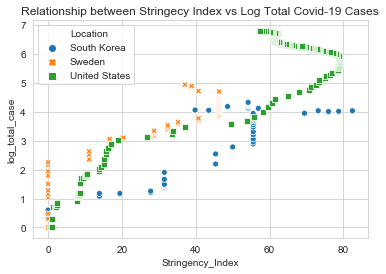

In [37]:
sns.set_style('whitegrid')
ax = sns.scatterplot(data = df_total, x=df_total['Stringency_Index'], y=df_total['log_total_case'], hue=df_total['Location'], style=df_total['Location'])
ax.set(title='Relationship between Stringecy Index vs Log Total Covid-19 Cases')
plt.show()

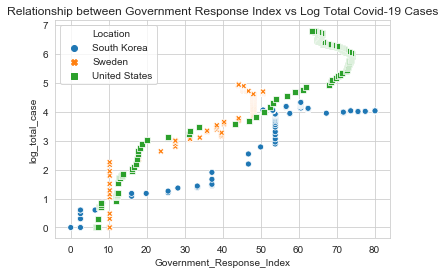

In [38]:
sns.set_style('whitegrid')
ax = sns.scatterplot(data = df_total, x=df_total['Government_Response_Index'], y=df_total['log_total_case'], hue=df_total['Location'], style=df_total['Location'])
ax.set(title='Relationship between Government Response Index vs Log Total Covid-19 Cases')
plt.show()

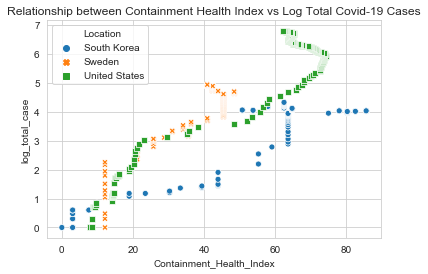

In [39]:
sns.set_style('whitegrid')
ax = sns.scatterplot(data = df_total, x=df_total['Containment_Health_Index'], y=df_total['log_total_case'], hue=df_total['Location'], style=df_total['Location'])
ax.set(title='Relationship between Containment Health Index vs Log Total Covid-19 Cases')
plt.show()

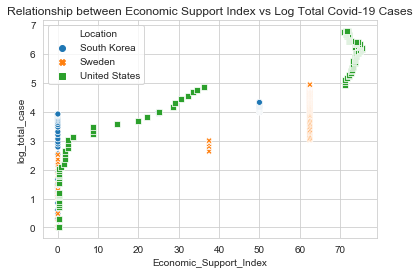

In [40]:
sns.set_style('whitegrid')
ax = sns.scatterplot(data = df_total, x=df_total['Economic_Support_Index'], y=df_total['log_total_case'], hue=df_total['Location'], style=df_total['Location'])
ax.set(title='Relationship between Economic Support Index vs Log Total Covid-19 Cases')
plt.show()

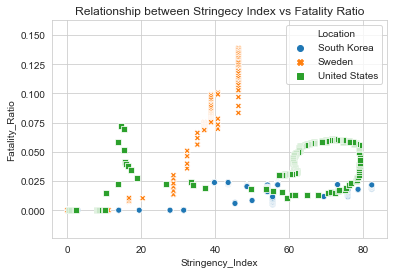

In [41]:
sns.set_style('whitegrid')
ax = sns.scatterplot(data = df_total, x=df_total['Stringency_Index'], y=df_total['Fatality_Ratio'], hue=df_total['Location'], style=df_total['Location'])
ax.set(title='Relationship between Stringecy Index vs Fatality Ratio')
plt.show()

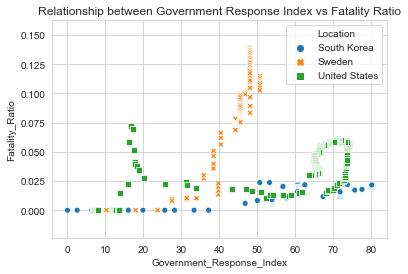

In [42]:
sns.set_style('whitegrid')
ax = sns.scatterplot(data = df_total, x=df_total['Government_Response_Index'], y=df_total['Fatality_Ratio'], hue=df_total['Location'], style=df_total['Location'])
ax.set(title='Relationship between Government Response Index vs Fatality Ratio')
plt.show()

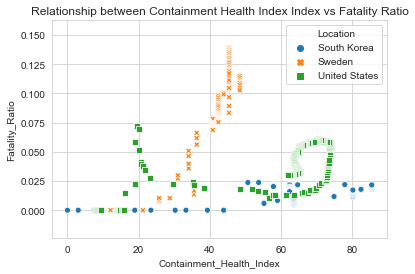

In [43]:
sns.set_style('whitegrid')
ax = sns.scatterplot(data = df_total, x=df_total['Containment_Health_Index'], y=df_total['Fatality_Ratio'], hue=df_total['Location'], style=df_total['Location'])
ax.set(title='Relationship between Containment Health Index Index vs Fatality Ratio')
plt.show()

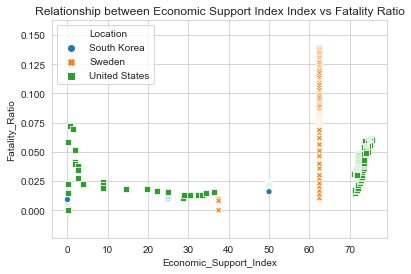

In [44]:
sns.set_style('whitegrid')
ax = sns.scatterplot(data = df_total, x=df_total['Economic_Support_Index'], y=df_total['Fatality_Ratio'], hue=df_total['Location'], style=df_total['Location'])
ax.set(title='Relationship between Economic Support Index Index vs Fatality Ratio')
plt.show()

### Prediction with PySpark

In [45]:
import six 
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.feature import VectorAssembler
sc= SparkContext()
sqlContext = SQLContext(sc)

In [46]:
df_prediction = df_total.drop(['Date','Date:1','month_yr'], axis=1)
spark_df = sqlContext.createDataFrame(df_prediction)

In [47]:
spark_df.head()

Row(Total_Case=1.0, Total_Death=0.0, Fatality_Ratio=0.0, Location='South Korea', Country_Name='South Korea', Stringency_Index=0.0, Government_Response_Index=0.0, Containment_Health_Index=0.0, Economic_Support_Index=0.0, log_total_case=0.0)

#### Correlation Exploration

In [48]:
for i in spark_df.columns:
    if i != 'Location' and i!='Total_Case' and i!='Total_Death' and i!='Fatality_Ratio':
        if not(isinstance(spark_df.select(i).take(1)[0][0], six.string_types)):
            print("Correlation to Log_Confirmed_Cases for ", i, spark_df.stat.corr('log_total_case', i))

Correlation to Log_Confirmed_Cases for  Stringency_Index 0.8224898209967086
Correlation to Log_Confirmed_Cases for  Government_Response_Index 0.8527658325606632
Correlation to Log_Confirmed_Cases for  Containment_Health_Index 0.780348792391687
Correlation to Log_Confirmed_Cases for  Economic_Support_Index 0.8896989345221187
Correlation to Log_Confirmed_Cases for  log_total_case 1.0


###### The correlation coefficient ranges from –1 to 1. 
When it is close to 1, it means that there is a strong positive correlation; 
for example, the median value tends to go up when the number of rooms goes up. 
When the coefficient is close to –1, it means that there is a strong negative correlation; 
the median value tends to go down when the percentage of the lower status of the population goes up. 
Finally, coefficients close to zero mean that there is no linear correlation.

In [49]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [50]:
targeted_variable = []
for i in spark_df.columns:
    if i != 'Location' and i!='Total_Case' and i!='Total_Death' and i!='Fatality_Ratio' and i!='log_total_case' and i!='Country_Name':
        targeted_variable.append(i)
print(targeted_variable)

['Stringency_Index', 'Government_Response_Index', 'Containment_Health_Index', 'Economic_Support_Index']


In [51]:
south_korea_df = spark_df.where(spark_df.Location == 'South Korea')
sweden_df = spark_df.where(spark_df.Location == 'Sweden')
us_df = spark_df.where(spark_df.Location == 'United States')

countries_df = [south_korea_df, sweden_df, us_df]

countries_features = []
for i in countries_df:
    vectorAssembler = VectorAssembler(inputCols = targeted_variable, outputCol = 'features')
    log_con_case_df = vectorAssembler.transform(i)
    log_con_case_df = log_con_case_df.select(['features','log_total_case'])
    log_con_case_df.show(10)
    countries_features.append(log_con_case_df)

+-------------------+-------------------+
|           features|     log_total_case|
+-------------------+-------------------+
|          (4,[],[])|                0.0|
|[0.0,2.56,3.03,0.0]|                0.0|
|[0.0,2.56,3.03,0.0]|                0.0|
|[0.0,2.56,3.03,0.0]|                0.0|
|[0.0,2.56,3.03,0.0]| 0.3010299956639812|
|[0.0,2.56,3.03,0.0]| 0.3010299956639812|
|[0.0,2.56,3.03,0.0]|0.47712125471966244|
|[0.0,2.56,3.03,0.0]| 0.6020599913279624|
|[0.0,2.56,3.03,0.0]| 0.6020599913279624|
|[0.0,6.41,7.58,0.0]| 0.6020599913279624|
+-------------------+-------------------+
only showing top 10 rows

+--------------------+--------------+
|            features|log_total_case|
+--------------------+--------------+
|[0.0,10.26,12.12,...|           0.0|
|[0.0,10.26,12.12,...|           0.0|
|[0.0,10.26,12.12,...|           0.0|
|[0.0,10.26,12.12,...|           0.0|
|[0.0,10.26,12.12,...|           0.0|
|[0.0,10.26,12.12,...|           0.0|
|[0.0,10.26,12.12,...|           0.0|
|[0.0,

In [52]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression

In [53]:
con = 0
for i in countries_features:
    splits = i.randomSplit([0.7, 0.3])
    train_df = splits[0]
    test_df = splits[1]
    #training regression model
    lr = LinearRegression(featuresCol = 'features', labelCol = 'log_total_case',
                         maxIter=20, regParam=0.3, elasticNetParam= 0.8)
    lr_model = lr.fit(train_df)
    print(str(countries_df[con].collect()[0][3])+" Coefficients: " + str(lr_model.coefficients))
    print(str(countries_df[con].collect()[0][3])+" Intercept: "+ str(lr_model.intercept))
    trainingSummary = lr_model.summary
    print( str(countries_df[con].collect()[0][3])+ " RMSE: %f" % trainingSummary.rootMeanSquaredError)
    print(str(countries_df[con].collect()[0][3])+ " r2: %f" % trainingSummary.r2)
    
    #passing test data on train model
    lr_predictions = lr_model.transform(test_df)
    lr_predictions.select("prediction", "log_total_case", "features").show(7)
    
    lr_evaluator= RegressionEvaluator(predictionCol = "prediction", labelCol="log_total_case", metricName="r2")
    print(str(countries_df[con].collect()[0][3])+" R Squared (R2) on test data = " + str(lr_evaluator.evaluate(lr_predictions)))
    
    test_result = lr_model.evaluate(test_df)
    print(str(countries_df[con].collect()[0][3])+" Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)
    
    con = con+1


South Korea Coefficients: [0.0,0.02558256997108275,0.004602145578880234,0.012443870337403488]
South Korea Intercept: 1.4931330114778036
South Korea RMSE: 0.522679
South Korea r2: 0.760505
+------------------+-------------------+--------------------+
|        prediction|     log_total_case|            features|
+------------------+-------------------+--------------------+
|1.5725688917077827|                0.0| [0.0,2.56,3.03,0.0]|
|1.5725688917077827| 0.3010299956639812| [0.0,2.56,3.03,0.0]|
|1.5725688917077827|0.47712125471966244| [0.0,2.56,3.03,0.0]|
| 2.109517054995326| 1.1760912590556813|[19.44,19.87,23.4...|
|2.2885151165764364|  1.255272505103306|[27.78,25.64,30.3...|
| 2.527078582966084|  1.380211241711606|[31.48,33.33,39.3...|
| 2.527078582966084| 1.4313637641589874|[31.48,33.33,39.3...|
+------------------+-------------------+--------------------+
only showing top 7 rows

South Korea R Squared (R2) on test data = 0.7451769616421524
South Korea Root Mean Squared Error (RMSE) o